In [24]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score

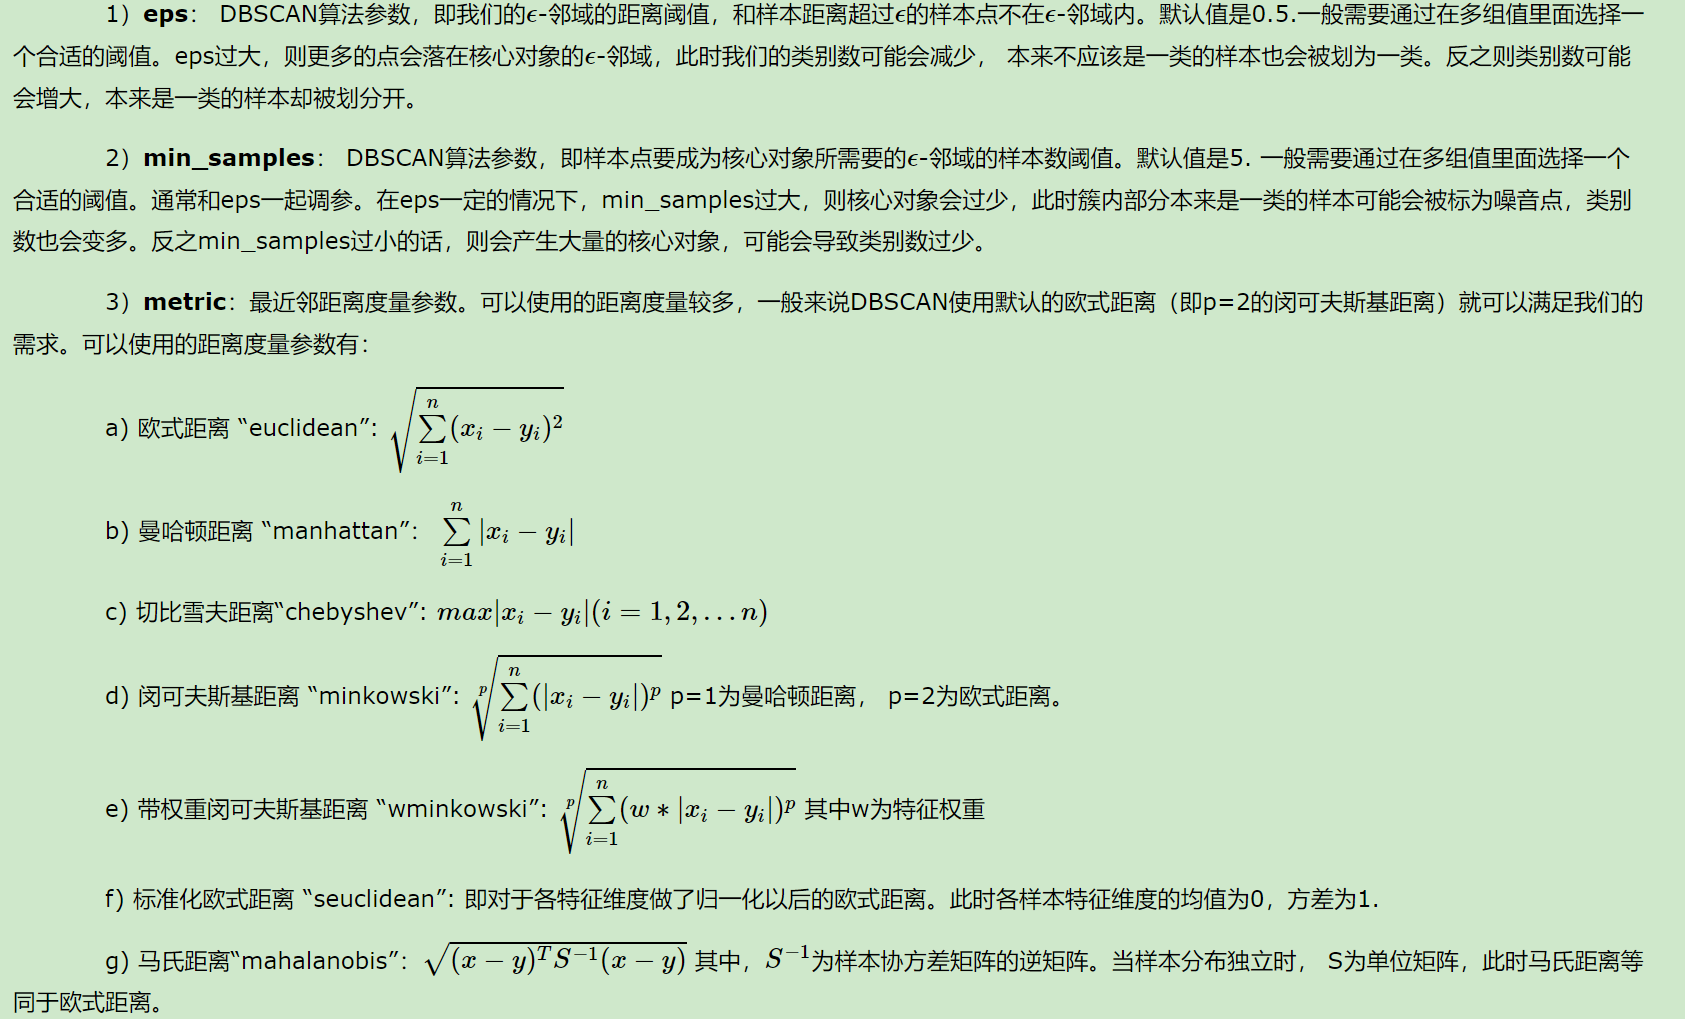
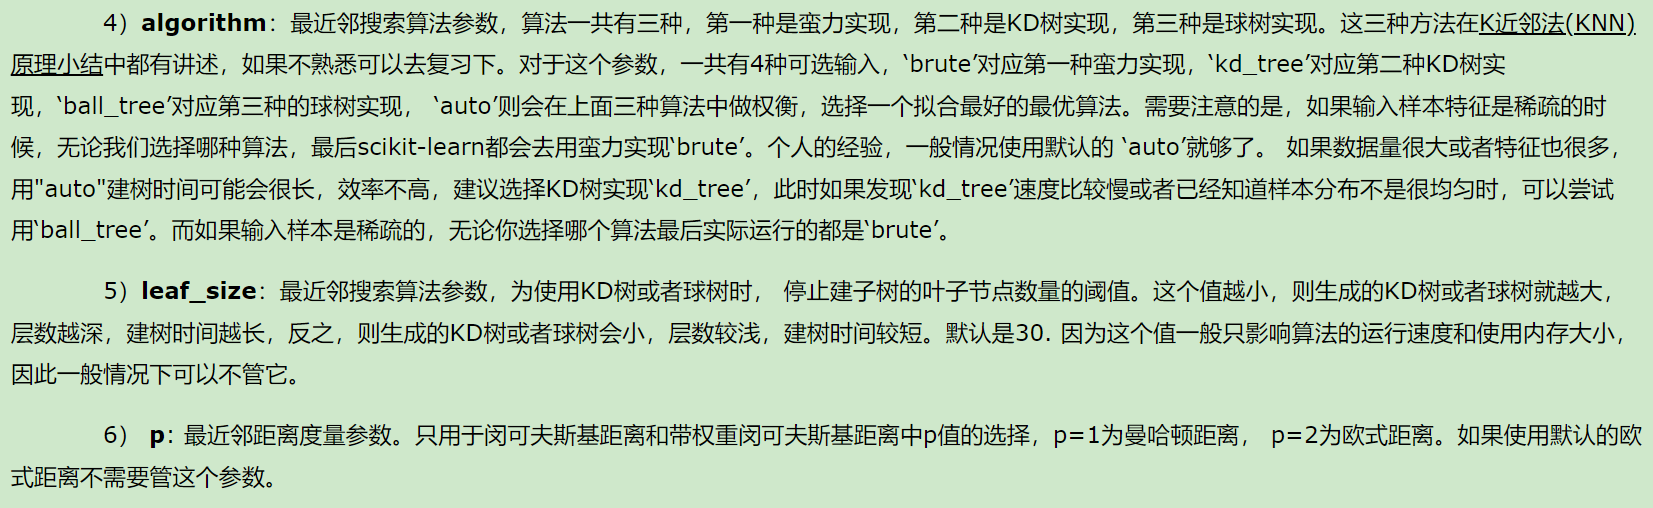

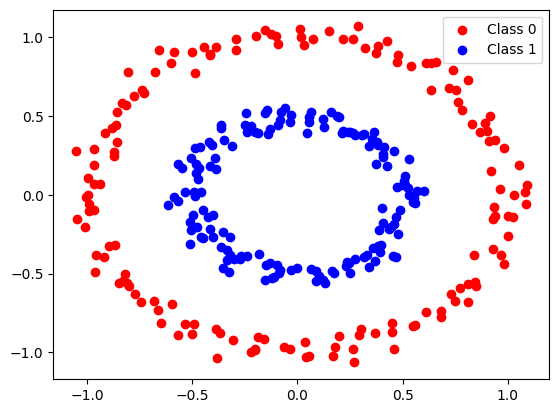

In [3]:
# 生成环状数据
# n_samples: 数据集中的总样本数。
# factor: 控制内外圆环的尺寸比例，取值范围在[0, 1)之间。
# noise: 添加到数据中的高斯噪声的标准差。
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# 绘制生成的数据
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class 1')

plt.legend()
plt.show()

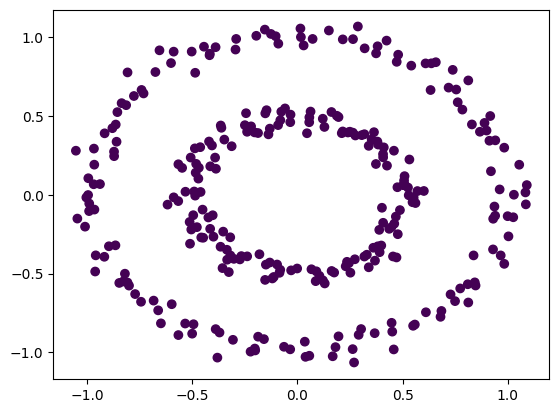

In [17]:
# 使用默认参数就聚成了一类
y_pred = DBSCAN().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
#仅有一个标签时会报错

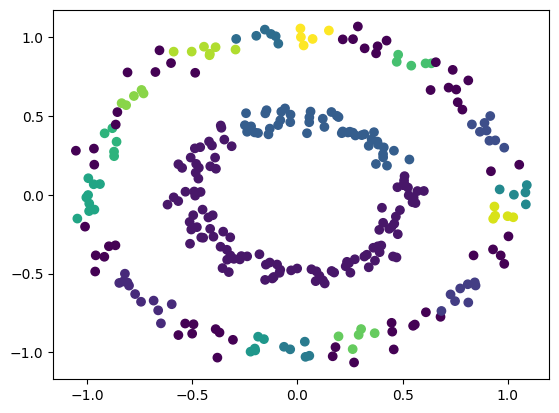

54.32728275179453


In [23]:
# 半径太小，效果也不佳
y_pred = DBSCAN(eps = 0.1,min_samples=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
# 使用DBSCAN时会将噪声作为-1标签，因此使用chs评估时，需要去掉噪声
# 获取非噪声点的索引
non_noise_indices = np.where(y_pred != -1)
print(calinski_harabasz_score(X=X[non_noise_indices], labels=y_pred[non_noise_indices]))

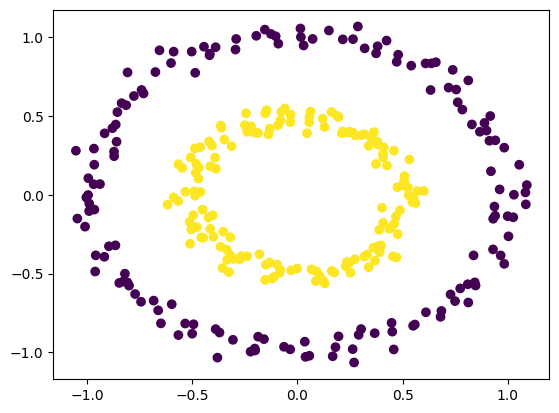

0.012795092614940927


In [21]:
y_pred = DBSCAN(eps = 0.3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
# 使用DBSCAN时会将噪声作为-1标签，因此使用chs评估时，需要去掉噪声
# 获取非噪声点的索引
non_noise_indices = np.where(y_pred != -1)
print(calinski_harabasz_score(X=X[non_noise_indices], labels=y_pred[non_noise_indices]))
# chs并不适合来评估这类样本